# In this notebook

- Rigorous cross-validation & model selection + test on a new scaffold of OLS model.
- Test interaction between structural elements.

# Getting started

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run nnn/ipynb_init.py
import explore_fig as ef

## Fitting dH model with line fit dH values instead

In [ ]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')

arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                    annotation_file=annotation_file)

myfilter = "dH_err_rel < 0.2 & Tm_err_abs < 2 & redchi < 1.5 & n_inlier > 10"
pass_df = arraydata.filter_two_state(min_rep_pass=2, force_recalculate=True, overwrite_dH=False, myfilter=myfilter)

variant_filter = 'Tm < 55 & Tm > 25'
arr = arraydata.data.join(arraydata.annotation).query(variant_filter)
arr['scaffold'] =arr.apply(lambda row: f'{row.bottomScaffold}_{row.topScaffold}', axis=1)

In [4]:
arr.to_csv('./data/fitted_variant/arr.csv', sep='\t')

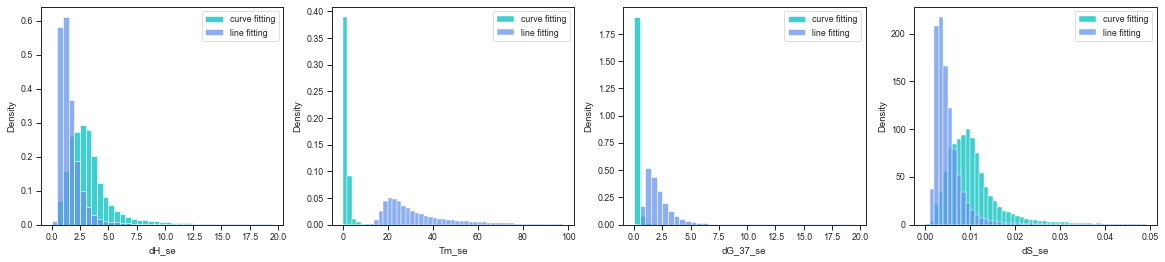

In [61]:
# why only overwrite dH
fig, ax = plt.subplots(1,4,figsize=(20,4))
for i,p in enumerate(params):
    
    if p == 'Tm':
        bins = np.arange(0,100,2)
    elif p == 'dS':
        bins = np.arange(0,0.05,0.001)
    else:
        bins = np.arange(0,20,.5)
    
    sns.histplot(arr[p+'_se'], bins=bins, stat='density', kde=False, label='curve fitting', color='c', ax=ax[i])
    sns.histplot(df[p+'_se'], bins=bins, stat='density', kde=False, label='line fitting', color='cornflowerblue', ax=ax[i])
    ax[i].legend()
# plt.xlim([0,100])

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


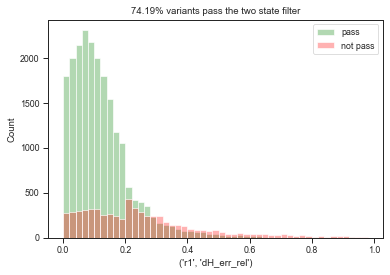

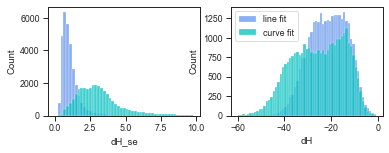

known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)
known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)


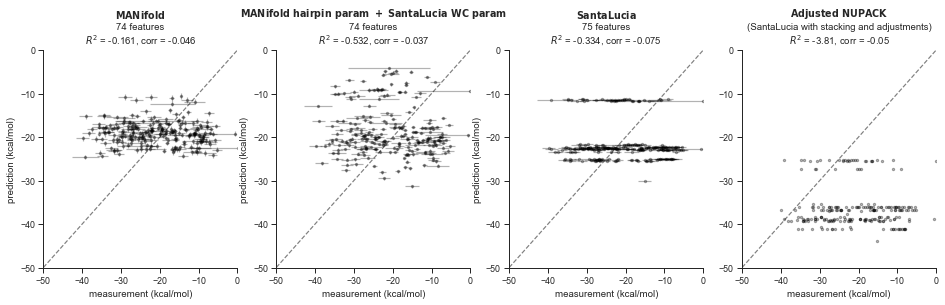

In [135]:
ef.plot_triloop_linear_model(param='dH')

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


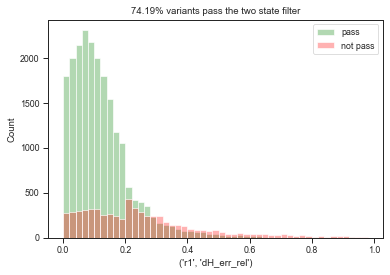

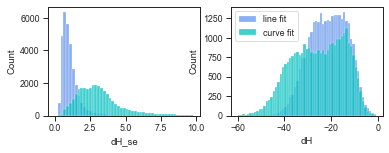

known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)
known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)


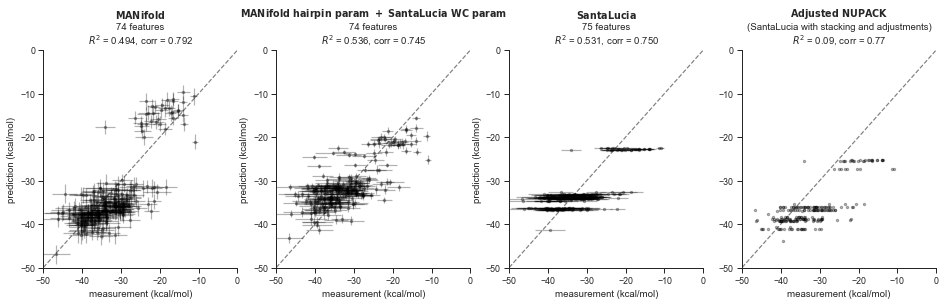

In [138]:
ef.plot_triloop_linear_model(param='dH')

### Conclusion

The line-fit dH is very useless unless specifically optimized. (no priority)

In [139]:
a=np.zeros((3,1))
b=np.zeros(3)
a, b

[autoreload of numpy.core.multiarray failed: Traceback (most recent call last):
  File "/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/numpy/core/multiarray.py", line 250, in <module>
    def inner(a, b):
  File "/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/numpy/core/overrides.py", line 

(array([[0.],
        [0.],
        [0.]]),
 array([0., 0., 0.]))

In [ ]:
import numpy